# Coding Etiquette & Excel Reporting

## 01 Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02 Create path

In [2]:
path = r'C:\Users\rober_fjs0dbr\OneDrive\Documents\CF Coursework\Python Fundamentals for Data Analysts\11-04-2022 Instacart Basket Analysis'


In [3]:
path

'C:\\Users\\rober_fjs0dbr\\OneDrive\\Documents\\CF Coursework\\Python Fundamentals for Data Analysts\\11-04-2022 Instacart Basket Analysis'

## 03 Import data

In [4]:
# import complete_instacart_data_final.pkl as dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'complete_instacart_data_final.pkl'))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9289401 entries, 0 to 9721095
Data columns (total 41 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int32  
 1   user_id                        int32  
 2   order_number                   int8   
 3   orders_day_of_week             int8   
 4   order_hour_of_day              int8   
 5   days_since_prior_order         float16
 6   product_id                     float16
 7   add_to_cart_order              float16
 8   reordered                      float16
 9   product_name                   object 
 10  aisle_id                       int32  
 11  department_id                  int32  
 12  prices                         float16
 13  price_range_loc                object 
 14  busiest_days                   object 
 15  busiest_period_of_day          object 
 16  max_order                      int8   
 17  loyalty_flag                   object 
 18  av

## 04 Visualizations for Final Report Cont...

### Q4.

Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [6]:
# create frequency table of 'department' column

dept_freq_table = pd.crosstab(df['department'], 'count_department')

dept_freq_table

col_0,count_department
department,
alcohol,43495
babies,123187
bakery,336861
beverages,771330
breakfast,201212
bulk,10141
canned goods,304524
dairy eggs,1552918
deli,301830


In [7]:
dept_freq_table = dept_freq_table.sort_values('count_department', ascending=True)

#### A. Bar chart: Product frequency

Text(0, 0.5, 'Department')

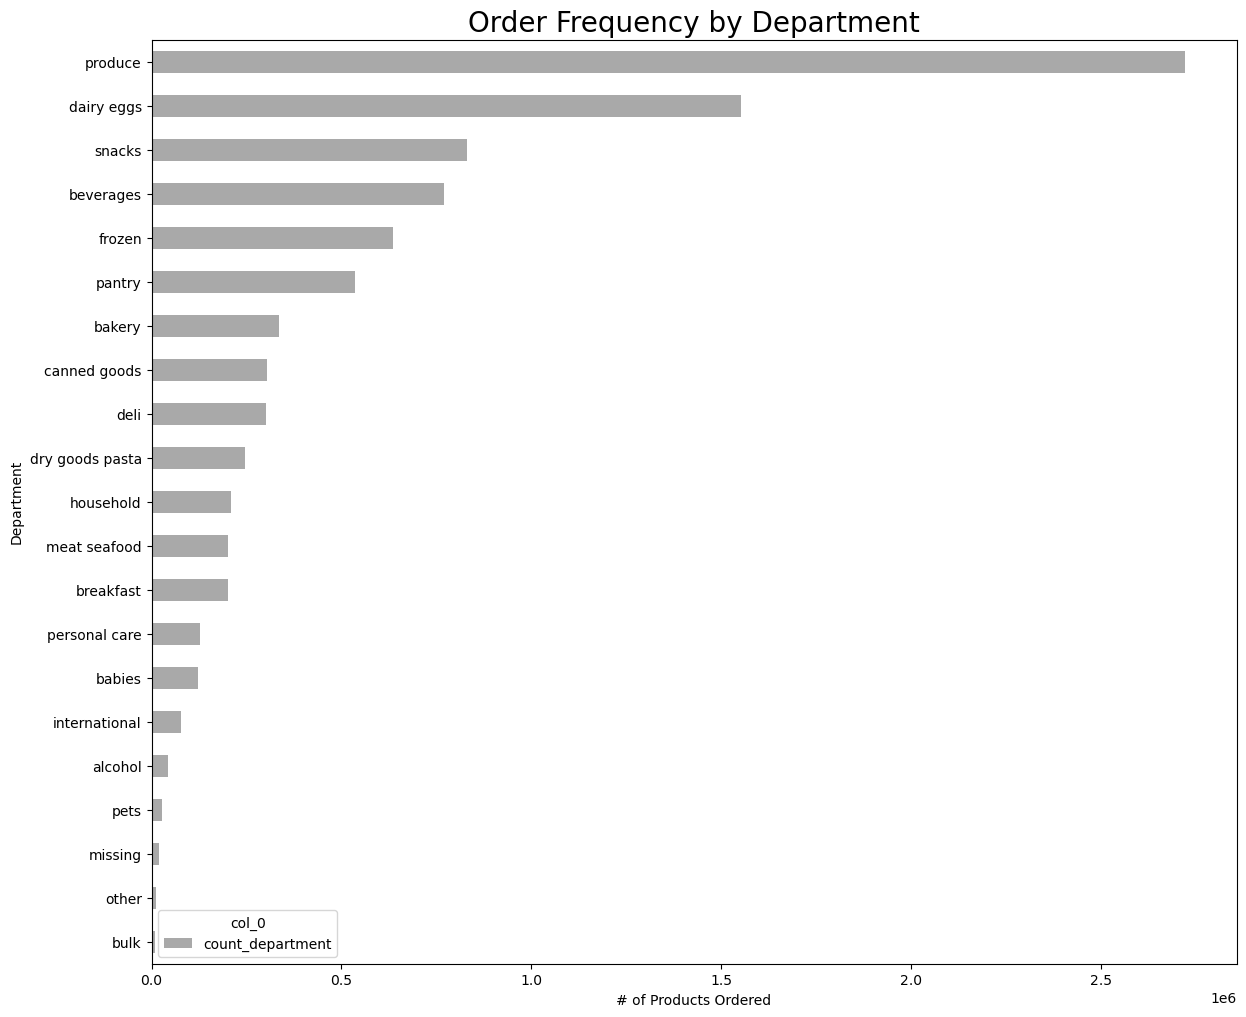

In [8]:
dept_freq_table.plot(kind='barh', 
                    stacked=False, 
                    color='darkgrey',  
                    figsize=(14,12))

plt.title('Order Frequency by Department', fontsize=20)
plt.xlabel("# of Products Ordered")
plt.ylabel("Department")

Produce, dairy eggs, snacks, beverages, and frozen departments have the most orders.

### Q5.

What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [9]:
#Creating a crosstab for 'frequency_flag' and 'loyalty_flag'
loyal_order_freq = pd.crosstab(df['loyalty_flag'], df['frequency_flag'])
loyal_order_freq

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,3084613,0,1257
New customer,387939,595644,458939
Regular customer,2889965,272982,1598062


In [10]:
#Creating a crosstab of proportion for 'frequency_flag' and 'loyalty_flag'

loyal_order_freq_prop = pd.crosstab(index=df['loyalty_flag'],
                             columns=df['frequency_flag'],
                             normalize="index")
loyal_order_freq_prop

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal customer,0.999593,0.000000,0.000407
New customer,0.268931,0.412918,0.318150
Regular customer,0.607007,0.057337,0.335656


In [11]:
#creating cross tab to display labels
loyal_order_freq_labels=pd.crosstab(index=df['loyalty_flag'],columns=df['frequency_flag'])

#### A. Stacked Bar Chart : Order Frequency by Loyalty

Text(0, 0.5, '# of Customers')

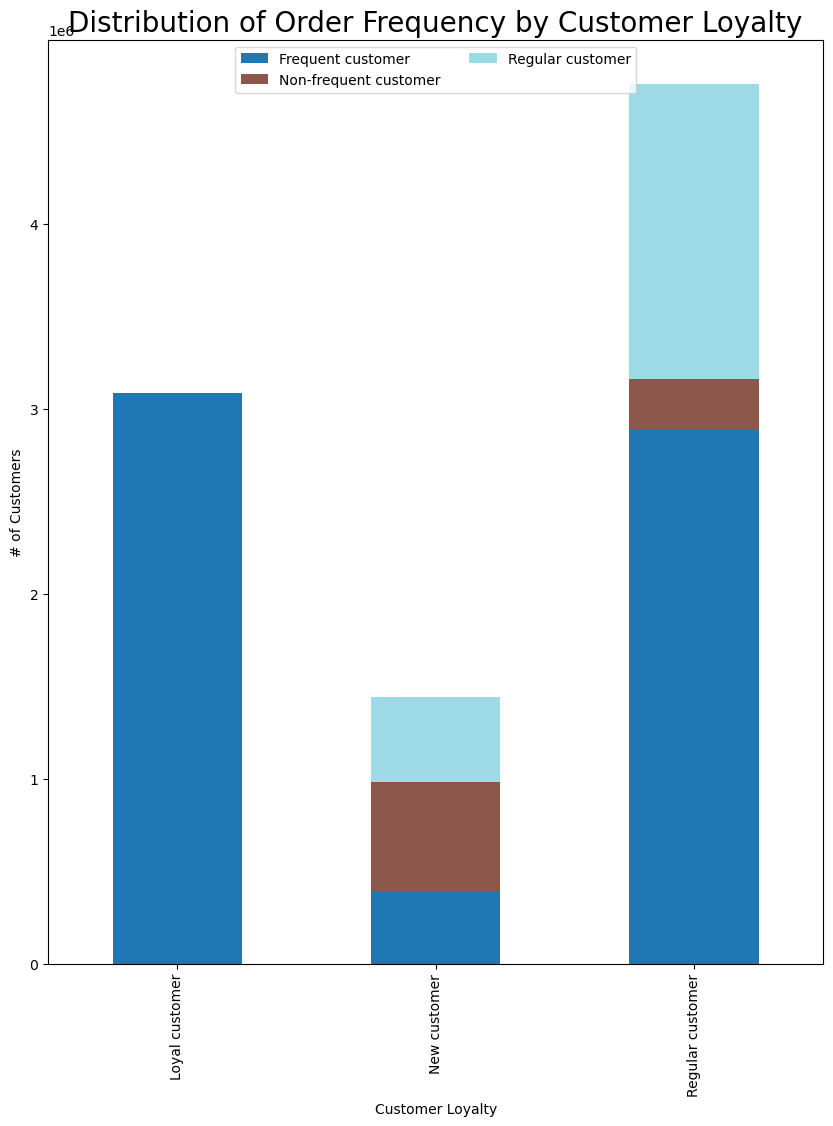

In [12]:
loyal_order_freq.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20',  
                    figsize=(10,12))

plt.title('Distribution of Order Frequency by Customer Loyalty', fontsize=20)
plt.legend(loc="upper center", ncol=2)
plt.xlabel("Customer Loyalty")
plt.ylabel("# of Customers")


                

Customers whose loyalty status is considered regular make up the largest portion of Instacarts clients, loyal customers the next largest group and new customers the least. Loyal customers usually are frequent customers, new customers are a mix of frequent, regular, and non-frequent customers, and regular customers tend to order more frequently.

In [13]:
#Creating a crosstab for 'price_range_loc' and 'loyalty_flag'

loyal_price = pd.crosstab(df['loyalty_flag'], df['price_range_loc'])

loyal_price

price_range_loc,High_range_product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,35750,964498,2085622
New customer,19973,450389,972160
Regular customer,63767,1486990,3210252


In [14]:
#creating cross tab to display labels
loyal_price_labels=pd.crosstab(index=df['loyalty_flag'],columns=df['price_range_loc'])

In [15]:
#Creating a crosstab of proportion for 'frequency_flag' and 'loyalty_flag'

loyal_price_prop = pd.crosstab(index=df['loyalty_flag'],
                             columns=df['price_range_loc'],
                             normalize="index")
loyal_price_prop

price_range_loc,High_range_product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,0.011585,0.312553,0.675862
New customer,0.013846,0.312223,0.673931
Regular customer,0.013394,0.312327,0.674280


Text(0, 0.5, 'Proportion')

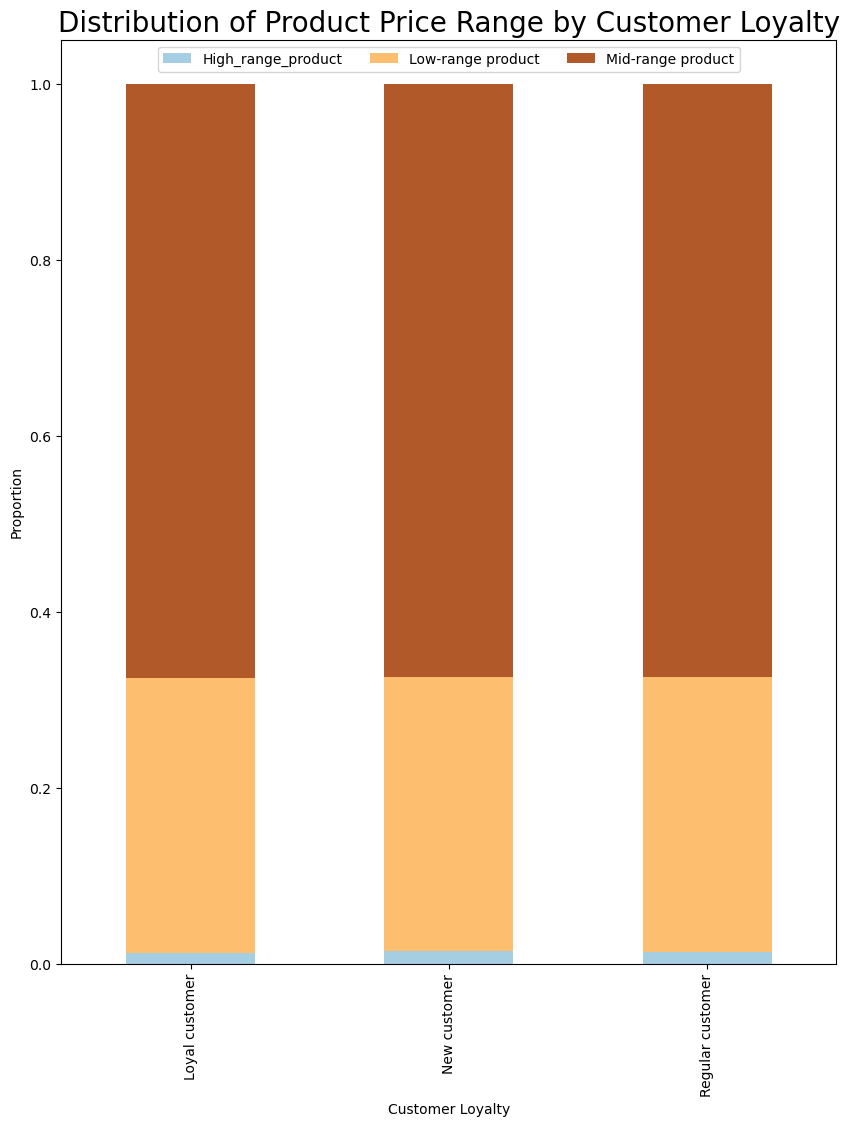

In [16]:
loyal_price_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Paired',  
                    figsize=(10,12))

plt.title('Distribution of Product Price Range by Customer Loyalty', fontsize=20)
plt.legend(loc="upper center", ncol=3)
plt.xlabel("Customer Loyalty")
plt.ylabel("Proportion")


### Q6.

 Are there differences in ordering habits based on a customer’s loyalty status?

In [17]:
#Creating a crosstab for 'spender_flag' and 'loyalty_flag'
loyal_spend = pd.crosstab(df['loyalty_flag'], df['spender_flag'])
loyal_spend

spender_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,4168,3081702
New customer,10935,1431587
Regular customer,14058,4746951


In [18]:
#Creating a crosstab of proportion for 'spender' and 'loyalty_flag'

loyal_spend_prop = pd.crosstab(index=df['loyalty_flag'],
                             columns=df['spender_flag'],
                             normalize="index")
loyal_spend_prop

spender_flag,High spender,Low spender
loyalty_flag,,
Loyal customer,0.001351,0.998649
New customer,0.007580,0.992420
Regular customer,0.002953,0.997047


In [19]:
#creating cross tab to display labels
loyal_spend_labels=pd.crosstab(index=df['loyalty_flag'],columns=df['spender_flag'])

#### A. Stacked Bar Chart: Spending Habits by Loyalty

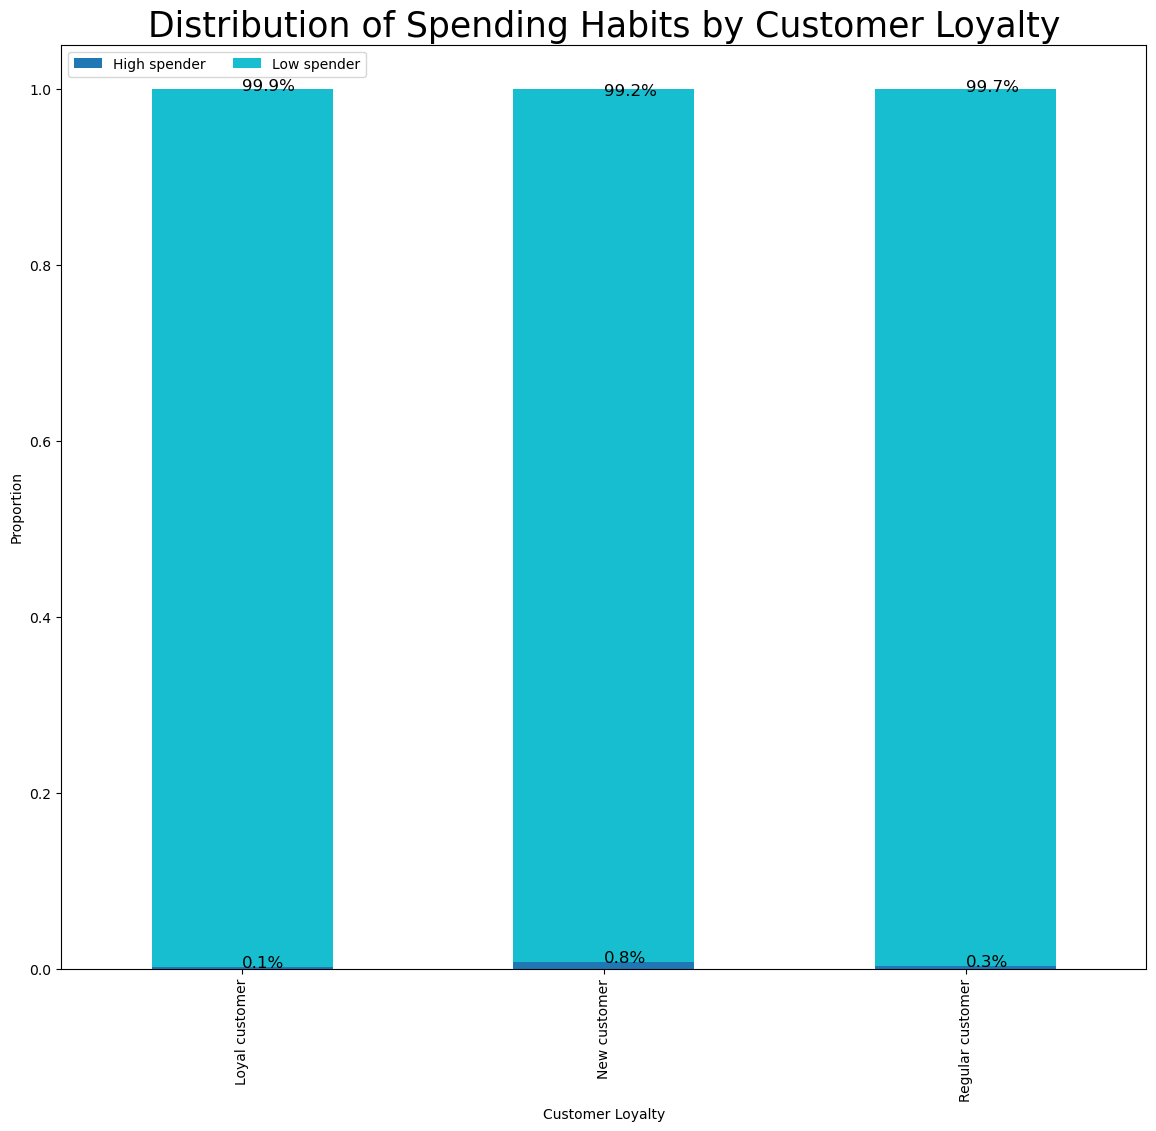

In [20]:
loyal_spend_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(14,12))

plt.title('Distribution of Spending Habits by Customer Loyalty', fontsize=25)
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Customer Loyalty")
plt.ylabel("Proportion")


for n, x in enumerate([*loyal_spend.index.values]):
    for proportion in loyal_spend_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)


Practically all loyal customers are profiled as low spenders, the same can be said for all cutomer loyalty profiles. New customers have the best chance of being high spenders but it is still less than a percent of new customers.

### Q7.

Are there differences in ordering habits based on a customer’s region?

In [21]:
#Creating a crosstab for 'spender_flag' and 'region'
spend_region = pd.crosstab(df['region'], df['spender_flag'])
spend_region

spender_flag,High spender,Low spender
region,,
Midwest,7188,2172590
Northeast,4563,1634588
South,9929,3082341
West,7481,2370721


In [22]:
#Creating a crosstab of proportion for 'spender' and 'region'

spend_region_prop = pd.crosstab(index=df['region'],
                             columns=df['spender_flag'],
                             normalize="index")
spend_region_prop

spender_flag,High spender,Low spender
region,,
Midwest,0.003298,0.996702
Northeast,0.002784,0.997216
South,0.003211,0.996789
West,0.003146,0.996854


#### A. Stacked Bar Chart: Pending Habits by Region

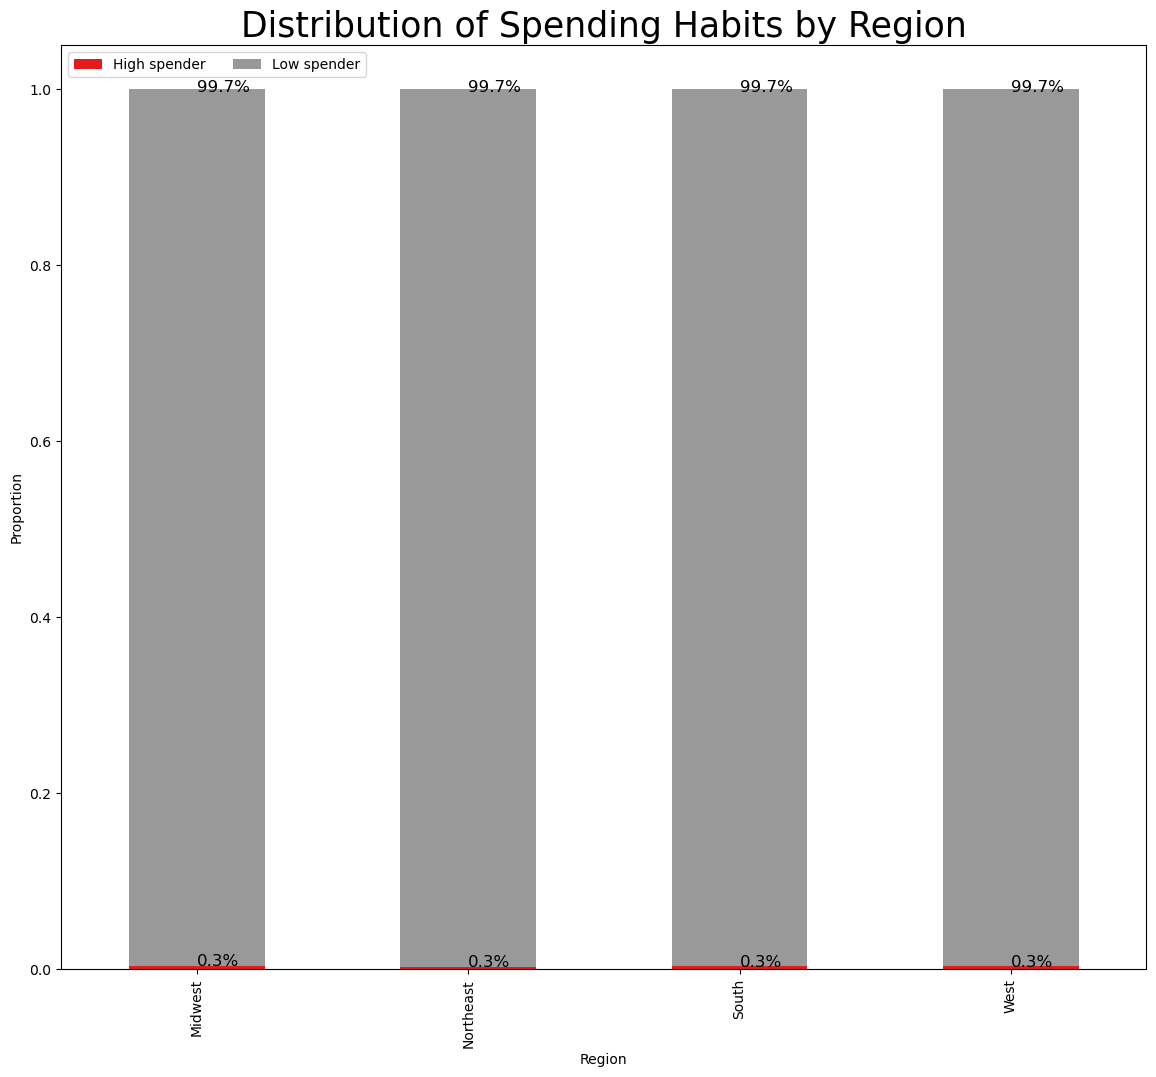

In [23]:
spend_region_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(14,12))

plt.title('Distribution of Spending Habits by Region', fontsize=25)
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Region")
plt.ylabel("Proportion")


for n, x in enumerate([*spend_region.index.values]):
    for proportion in spend_region_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)

There is no difference in ordering habits across regions.

In [24]:
#Creating a crosstab for 'frequency_flag' and 'region'
freq_region = pd.crosstab(df['region'], df['frequency_flag'])
freq_region

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,1481427,207291,491060
Northeast,1121465,148965,368721
South,2123467,290357,678446
West,1636158,222013,520031


In [25]:
#Creating a crosstab of proportion for 'frequency_flag' and 'region'

freq_region_prop = pd.crosstab(index=df['region'],
                             columns=df['frequency_flag'],
                             normalize="index")
freq_region_prop

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,0.679623,0.095097,0.225280
Northeast,0.684174,0.090879,0.224946
South,0.686702,0.093898,0.219401
West,0.687981,0.093353,0.218666


#### B. Stacked Bar Chart: Order Frequency by Region

Text(0, 0.5, 'Proportion')

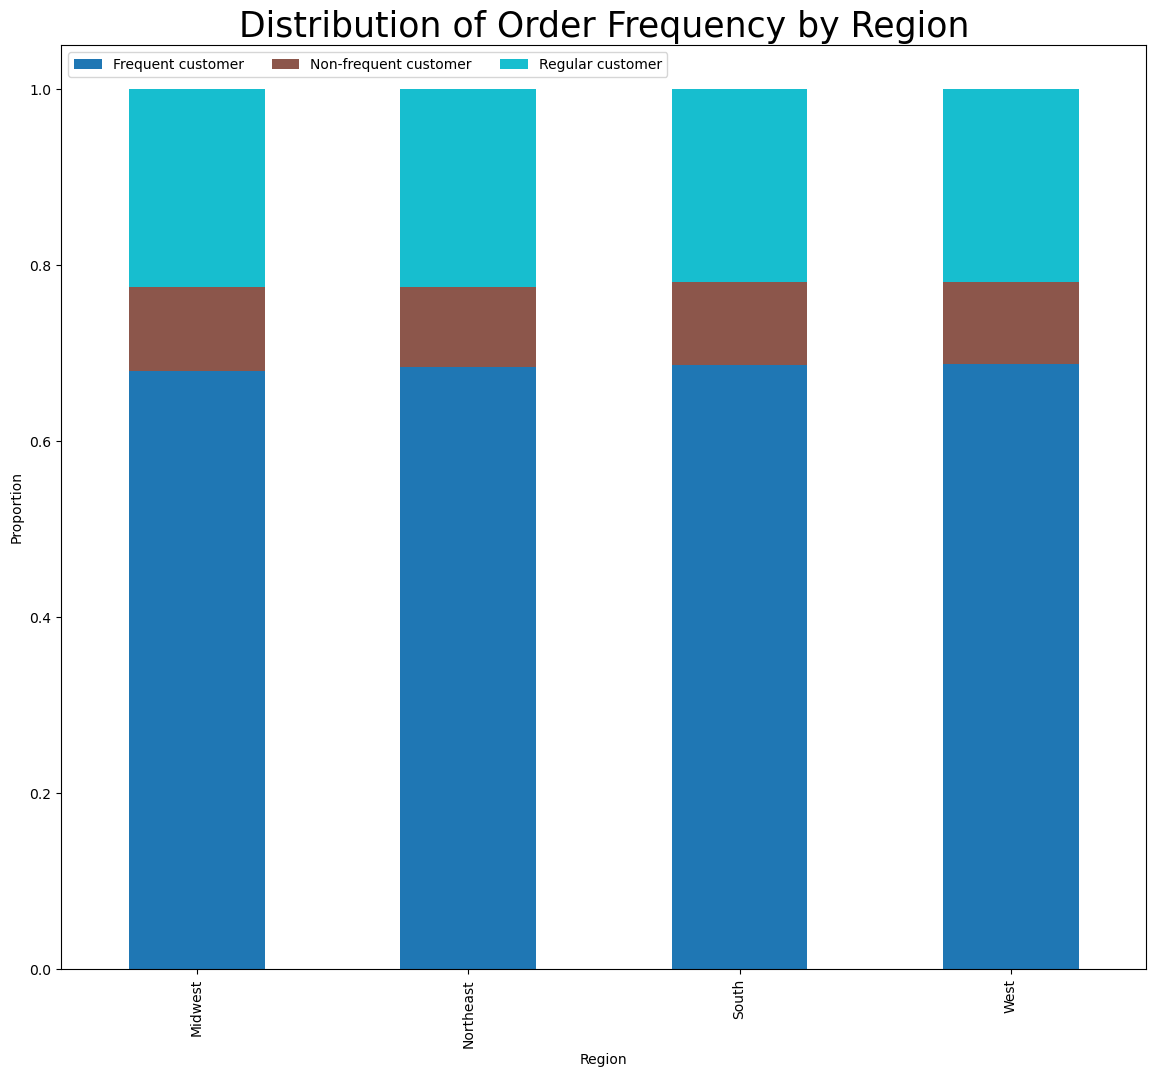

In [26]:
freq_region_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(14,12))

plt.title('Distribution of Order Frequency by Region', fontsize=25)
plt.legend(loc="upper left", ncol=3)
plt.xlabel("Region")
plt.ylabel("Proportion")



                
        

Customer order frequency is uniform across all regions.

In [27]:
#Creating a crosstab for 'frequency_flag' and 'region'
dept_region = pd.crosstab(df['department'], df['region'])
dept_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,10309,7544,14672,10970
babies,28772,21853,41905,30657
bakery,78554,59813,111568,86926
beverages,180199,138664,257886,194581
breakfast,47067,35168,66914,52063
bulk,2371,1702,3379,2689
canned goods,71962,53055,101171,78336
dairy eggs,363703,274459,516710,398046
deli,70609,53696,100149,77376


In [28]:
#creating cross tab to display labels
dept_region_labels=pd.crosstab(index=df['department'],columns=df['region'])

In [29]:
dept_region_labels

region,Midwest,Northeast,South,West
department,,,,
alcohol,10309,7544,14672,10970
babies,28772,21853,41905,30657
bakery,78554,59813,111568,86926
beverages,180199,138664,257886,194581
breakfast,47067,35168,66914,52063
bulk,2371,1702,3379,2689
canned goods,71962,53055,101171,78336
dairy eggs,363703,274459,516710,398046
deli,70609,53696,100149,77376


In [30]:
#Creating a crosstab of proportion for 'frequency_flag' and 'region'

dept_region_prop = pd.crosstab(index=df['department'],
                             columns=df['region'],
                             normalize="index")
dept_region_prop

region,Midwest,Northeast,South,West
department,,,,
alcohol,0.237016,0.173445,0.337326,0.252213
babies,0.233564,0.177397,0.340174,0.248866
bakery,0.233194,0.177560,0.331199,0.258047
beverages,0.233621,0.179773,0.334339,0.252267
breakfast,0.233917,0.174781,0.332555,0.258747
bulk,0.233803,0.167834,0.333202,0.265161
canned goods,0.236310,0.174223,0.332227,0.257241
dairy eggs,0.234206,0.176738,0.332735,0.256321
deli,0.233936,0.177901,0.331806,0.256356


#### C. Stacked Bar Chart: Department Orders by Region

Text(0, 0.5, 'Proportion')

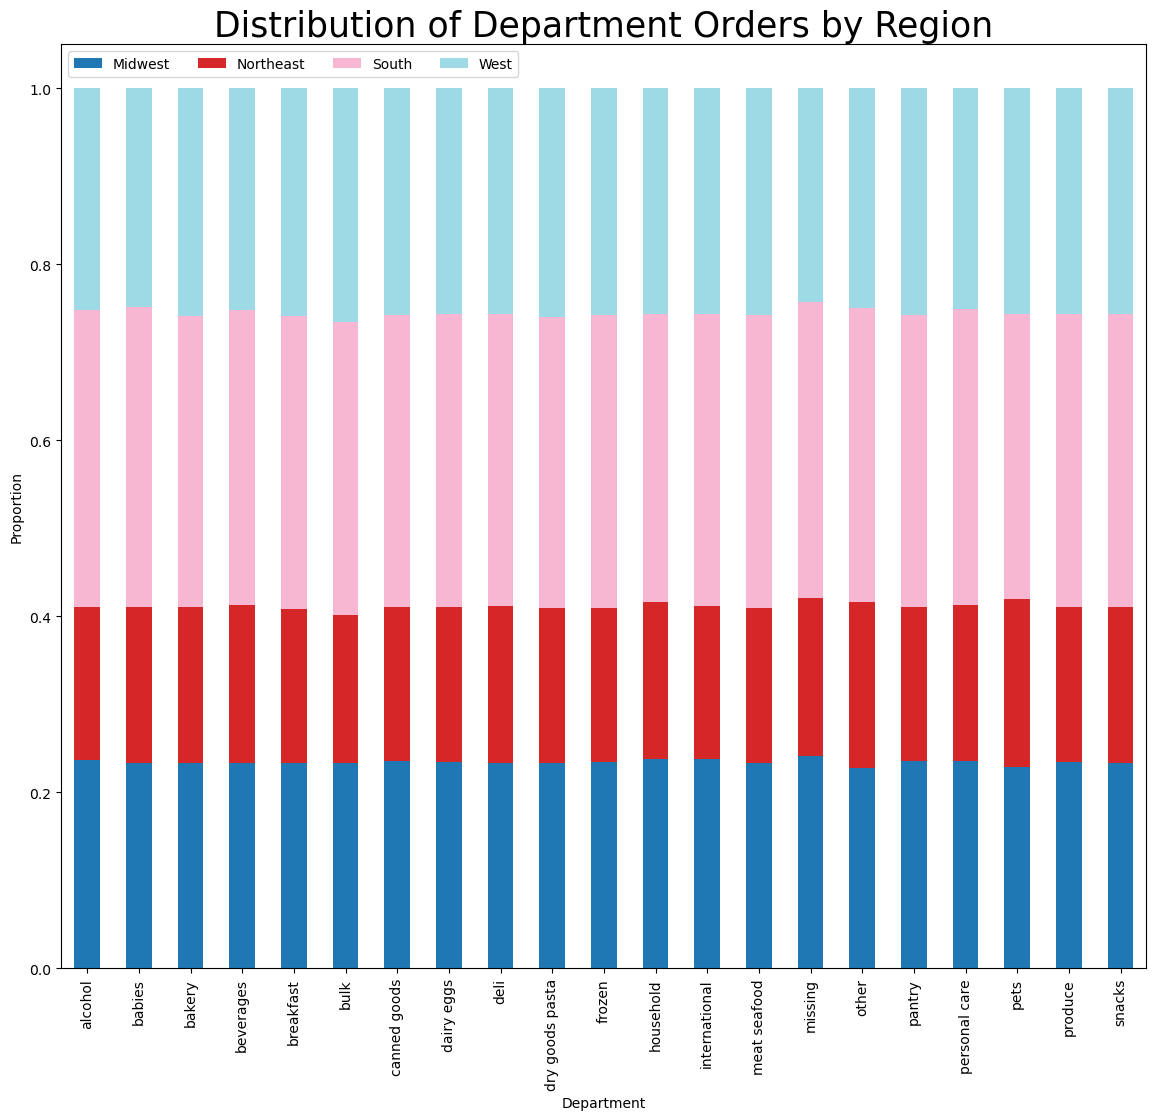

In [31]:
dept_region_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20', 
                    figsize=(14,12))

plt.title('Distribution of Department Orders by Region', fontsize=25)
plt.legend(loc="upper left", ncol=4)
plt.xlabel("Department")
plt.ylabel("Proportion")



In [32]:
list(dept_region.columns)

['Midwest', 'Northeast', 'South', 'West']

In [33]:
dept_midwest = dept_region.drop(['Northeast', 'South', 'West'], axis=1)

In [34]:
dept_midwest

region,Midwest
department,
alcohol,10309
babies,28772
bakery,78554
beverages,180199
breakfast,47067
bulk,2371
canned goods,71962
dairy eggs,363703
deli,70609


In [35]:
dept_midwest_sort = dept_midwest.sort_values(['Midwest'], ascending=[False]).head(10)

In [36]:
dept_midwest_sort

region,Midwest
department,
produce,640087
dairy eggs,363703
snacks,193751
beverages,180199
frozen,149458
pantry,126272
bakery,78554
canned goods,71962
deli,70609


#### D. HBar Chart: Top 10 Dept Midwest

Text(0, 0.5, 'Department')

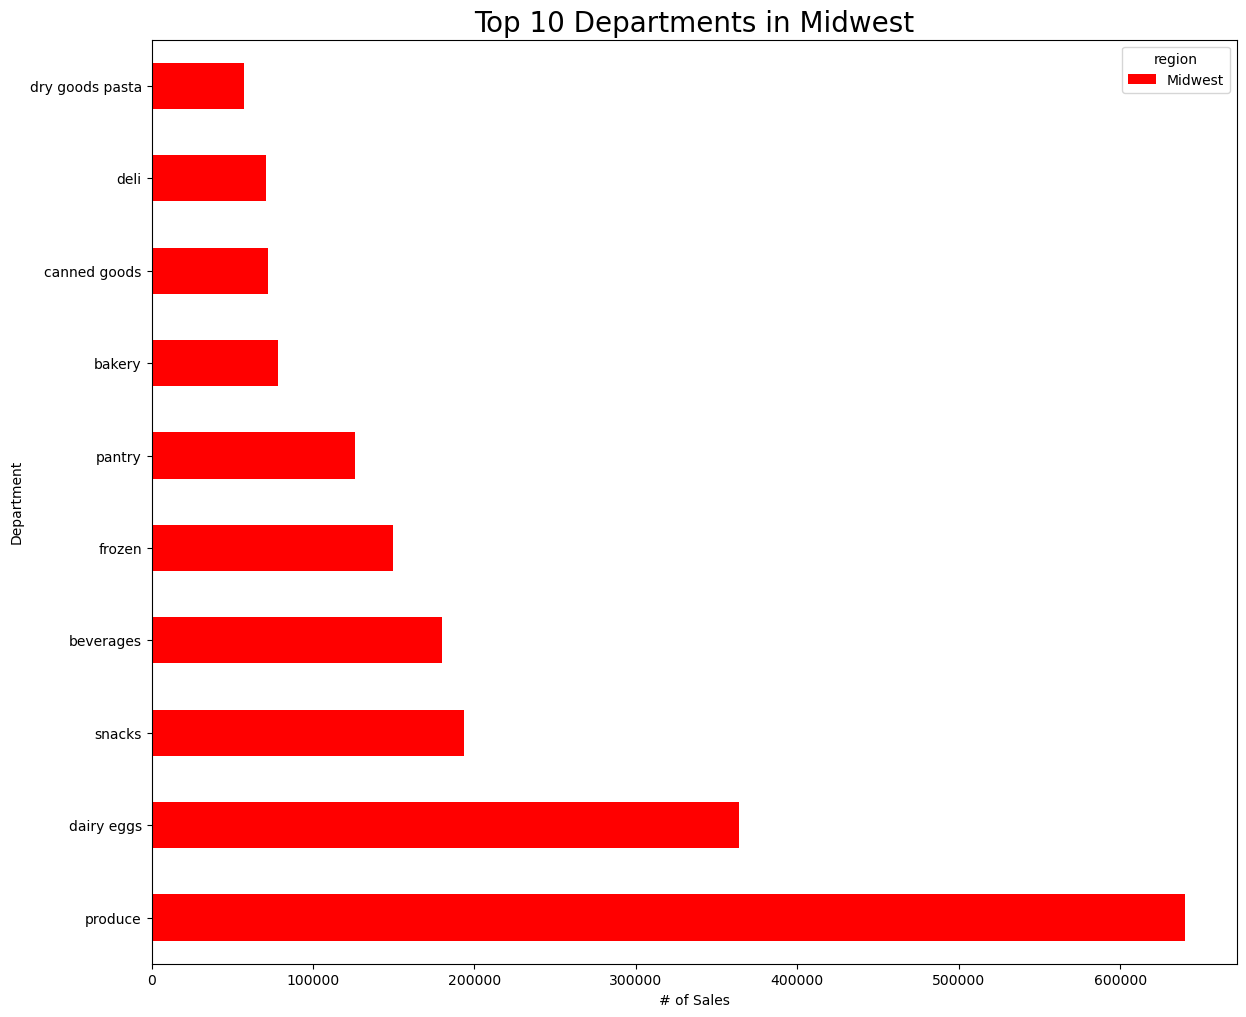

In [37]:
dept_midwest_sort.plot(kind='barh', 
                    stacked=False, 
                    color='red',  
                    figsize=(14,12))

plt.title('Top 10 Departments in Midwest', fontsize=20)
plt.xlabel("# of Sales")
plt.ylabel("Department")

In [38]:
dept_south = dept_region.drop(['Northeast', 'Midwest', 'West'], axis=1)

dept_south

region,South
department,
alcohol,14672
babies,41905
bakery,111568
beverages,257886
breakfast,66914
bulk,3379
canned goods,101171
dairy eggs,516710
deli,100149


In [39]:
dept_south_sort = dept_south.sort_values(['South'], ascending=[False]).head(10)

dept_south_sort

region,South
department,
produce,907147
dairy eggs,516710
snacks,275620
beverages,257886
frozen,212506
pantry,177297
bakery,111568
canned goods,101171
deli,100149


#### E. HBar Chart: Top 10 Dept South

Text(0, 0.5, 'Department')

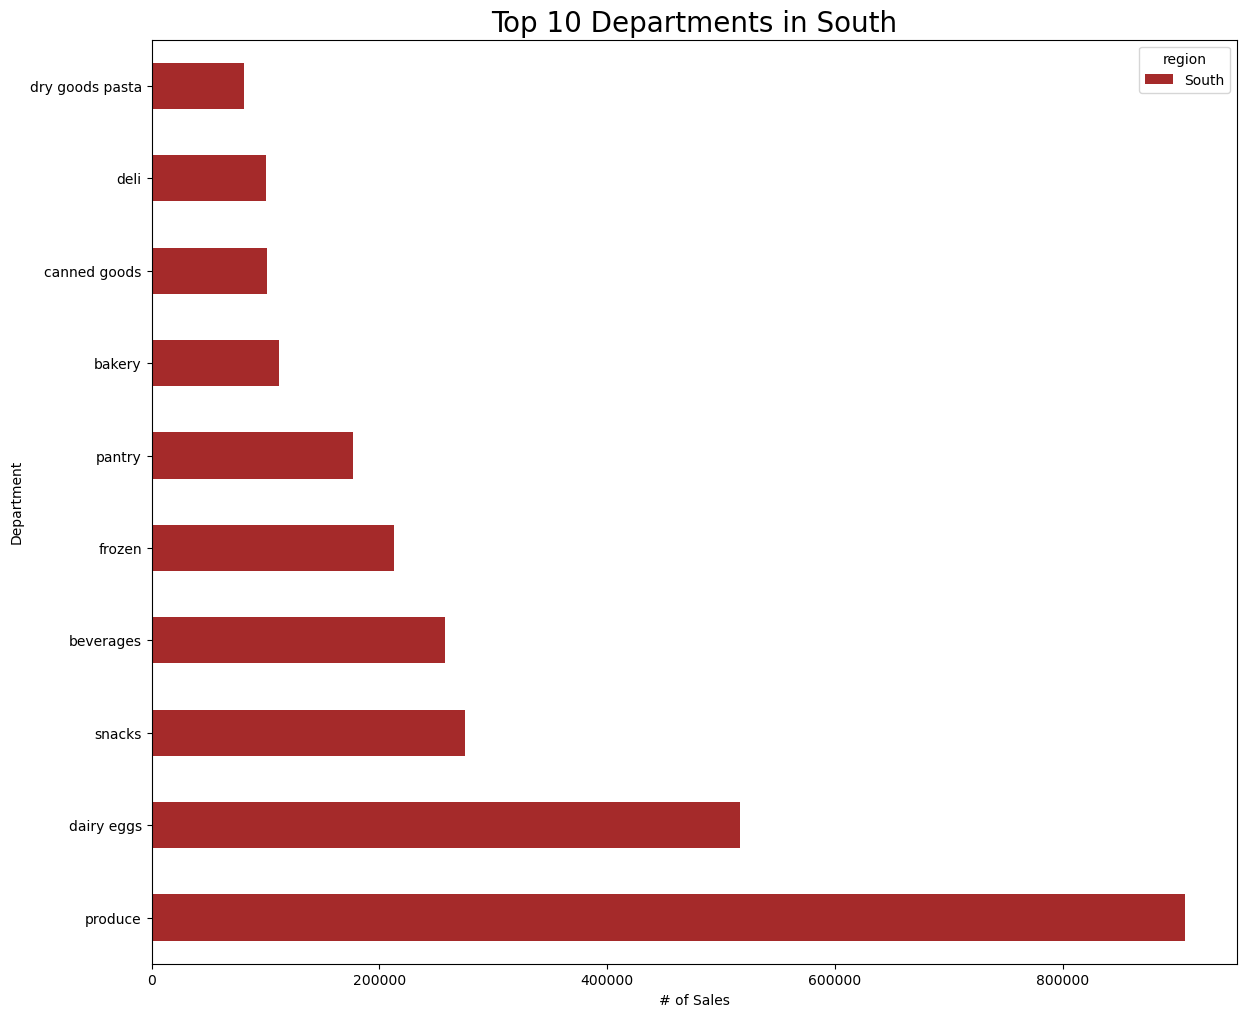

In [40]:
dept_south_sort.plot(kind='barh', 
                    stacked=False, 
                    color='brown',  
                    figsize=(14,12))

plt.title('Top 10 Departments in South', fontsize=20)
plt.xlabel("# of Sales")
plt.ylabel("Department")

In [41]:
dept_north = dept_region.drop(['South', 'Midwest', 'West'], axis=1)

dept_north

region,Northeast
department,
alcohol,7544
babies,21853
bakery,59813
beverages,138664
breakfast,35168
bulk,1702
canned goods,53055
dairy eggs,274459
deli,53696


In [42]:
dept_north_sort = dept_north.sort_values(['Northeast'], ascending=[False]).head(10)

dept_north_sort

region,Northeast
department,
produce,477833
dairy eggs,274459
snacks,147788
beverages,138664
frozen,110955
pantry,93669
bakery,59813
deli,53696
canned goods,53055


#### F. HBar Chart: Top 10 Dept Northeast

Text(0, 0.5, 'Department')

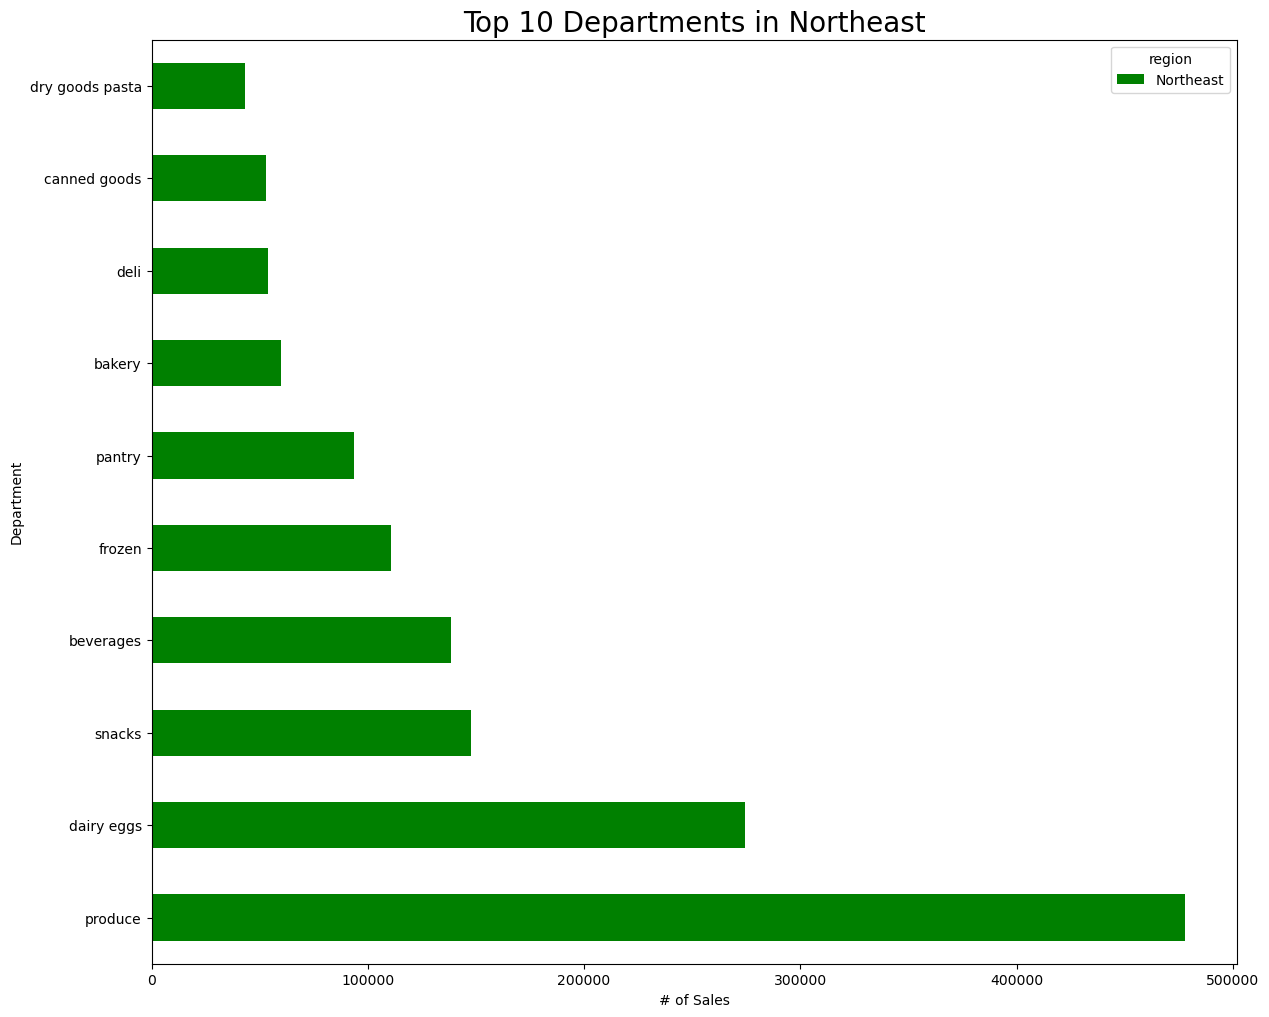

In [43]:
dept_north_sort.plot(kind='barh', 
                    stacked=False, 
                    color='green',  
                    figsize=(14,12))

plt.title('Top 10 Departments in Northeast', fontsize=20)
plt.xlabel("# of Sales")
plt.ylabel("Department")

In [44]:
dept_west = dept_region.drop(['South', 'Midwest', 'Northeast'], axis=1)

dept_west

region,West
department,
alcohol,10970
babies,30657
bakery,86926
beverages,194581
breakfast,52063
bulk,2689
canned goods,78336
dairy eggs,398046
deli,77376


In [45]:
dept_west_sort = dept_west.sort_values(['West'], ascending=[False]).head(10)

dept_west_sort

region,West
department,
produce,696466
dairy eggs,398046
snacks,213206
beverages,194581
frozen,163483
pantry,137518
bakery,86926
canned goods,78336
deli,77376


Region vs spending region vs freq flag

### Q8. 

Is there a connection between age and family status in terms of ordering habits?

age_family_status

In [46]:
#Creating a crosstab for 'spender_flag' and 'age_family_status'

spend_age_family = pd.crosstab(df['age_family_status'], df['spender_flag'])

spend_age_family

spender_flag,High spender,Low spender
age_family_status,,
adult-divorced/widowed,264,186693
adult-married,11259,3682966
adult-single,4352,1052057
senior-divorced/widowed,2311,604390
senior-married,5789,1847339
young adult-living with parents and siblings,1345,443764
young adult-married,2503,972724
young adult-single,1338,470307


In [47]:
#creating cross tab to display labels

spend_age_family_labels=pd.crosstab(index=df['age_family_status'],columns=df['spender_flag'])

In [48]:
#Creating a crosstab of proportion for 'spender' and 'region'

spend_age_family_prop = pd.crosstab(index=df['age_family_status'],
                             columns=df['spender_flag'],
                             normalize="index")
spend_age_family_prop

spender_flag,High spender,Low spender
age_family_status,,
adult-divorced/widowed,0.001412,0.998588
adult-married,0.003048,0.996952
adult-single,0.004120,0.995880
senior-divorced/widowed,0.003809,0.996191
senior-married,0.003124,0.996876
young adult-living with parents and siblings,0.003022,0.996978
young adult-married,0.002567,0.997433
young adult-single,0.002837,0.997163


#### A. Stacked Bar Chart: Spending Habits by Age and Family Status

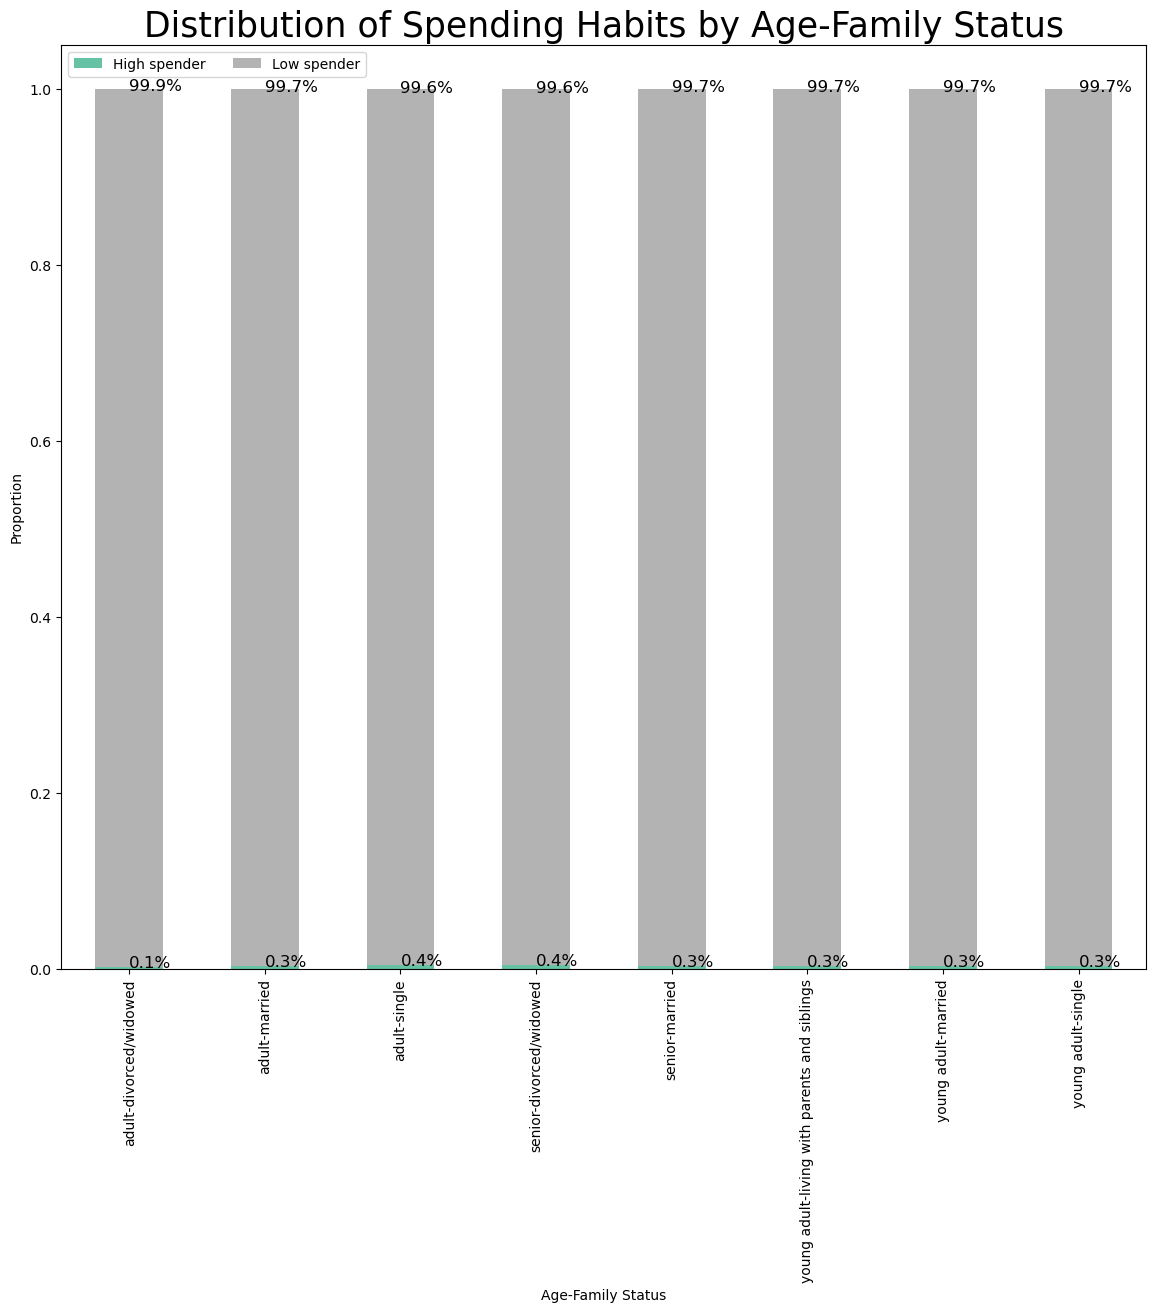

In [49]:
spend_age_family_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set2', 
                    figsize=(14,12))

plt.title('Distribution of Spending Habits by Age-Family Status', fontsize=25)
plt.legend(loc="upper left", ncol=2)
plt.xlabel("Age-Family Status")
plt.ylabel("Proportion")


for n, x in enumerate([*spend_age_family.index.values]):
    for proportion in spend_age_family_prop.loc[x]:
                
        plt.text(x=n,
                 y=proportion,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12)

The distribution of spending habits is relatively uniform across all age and family status groups.

price_range_loc

In [50]:
#Creating a crosstab for 'price_range_loc' and 'age_family_status'

price_age_family = pd.crosstab(df['age_family_status'], df['price_range_loc'])

price_age_family

price_range_loc,High_range_product,Low-range product,Mid-range product
age_family_status,,,
adult-divorced/widowed,2287,58176,126494
adult-married,47956,1153404,2492865
adult-single,13053,329444,713912
senior-divorced/widowed,8034,189735,408932
senior-married,24009,578399,1250720
young adult-living with parents and siblings,5679,138902,300528
young adult-married,12664,305318,657245
young adult-single,5808,148499,317338


In [51]:
#creating cross tab to display labels


price_age_family_labels=pd.crosstab(index=df['age_family_status'],columns=df['price_range_loc'])

In [52]:
#Creating a crosstab of proportion for 'age_family_status' and 'price_range_loc'

spend_age_family_prop = pd.crosstab(index=df['age_family_status'],
                             columns=df['price_range_loc'],
                             normalize="index")
spend_age_family_prop

price_range_loc,High_range_product,Low-range product,Mid-range product
age_family_status,,,
adult-divorced/widowed,0.012233,0.311173,0.676594
adult-married,0.012981,0.312218,0.674801
adult-single,0.012356,0.311853,0.675791
senior-divorced/widowed,0.013242,0.312732,0.674026
senior-married,0.012956,0.312120,0.674924
young adult-living with parents and siblings,0.012759,0.312063,0.675178
young adult-married,0.012986,0.313074,0.673941
young adult-single,0.012314,0.314853,0.672832


#### B. Stacked Bar Chart: Price range by Age-Family Status

Text(0, 0.5, 'Proportion')

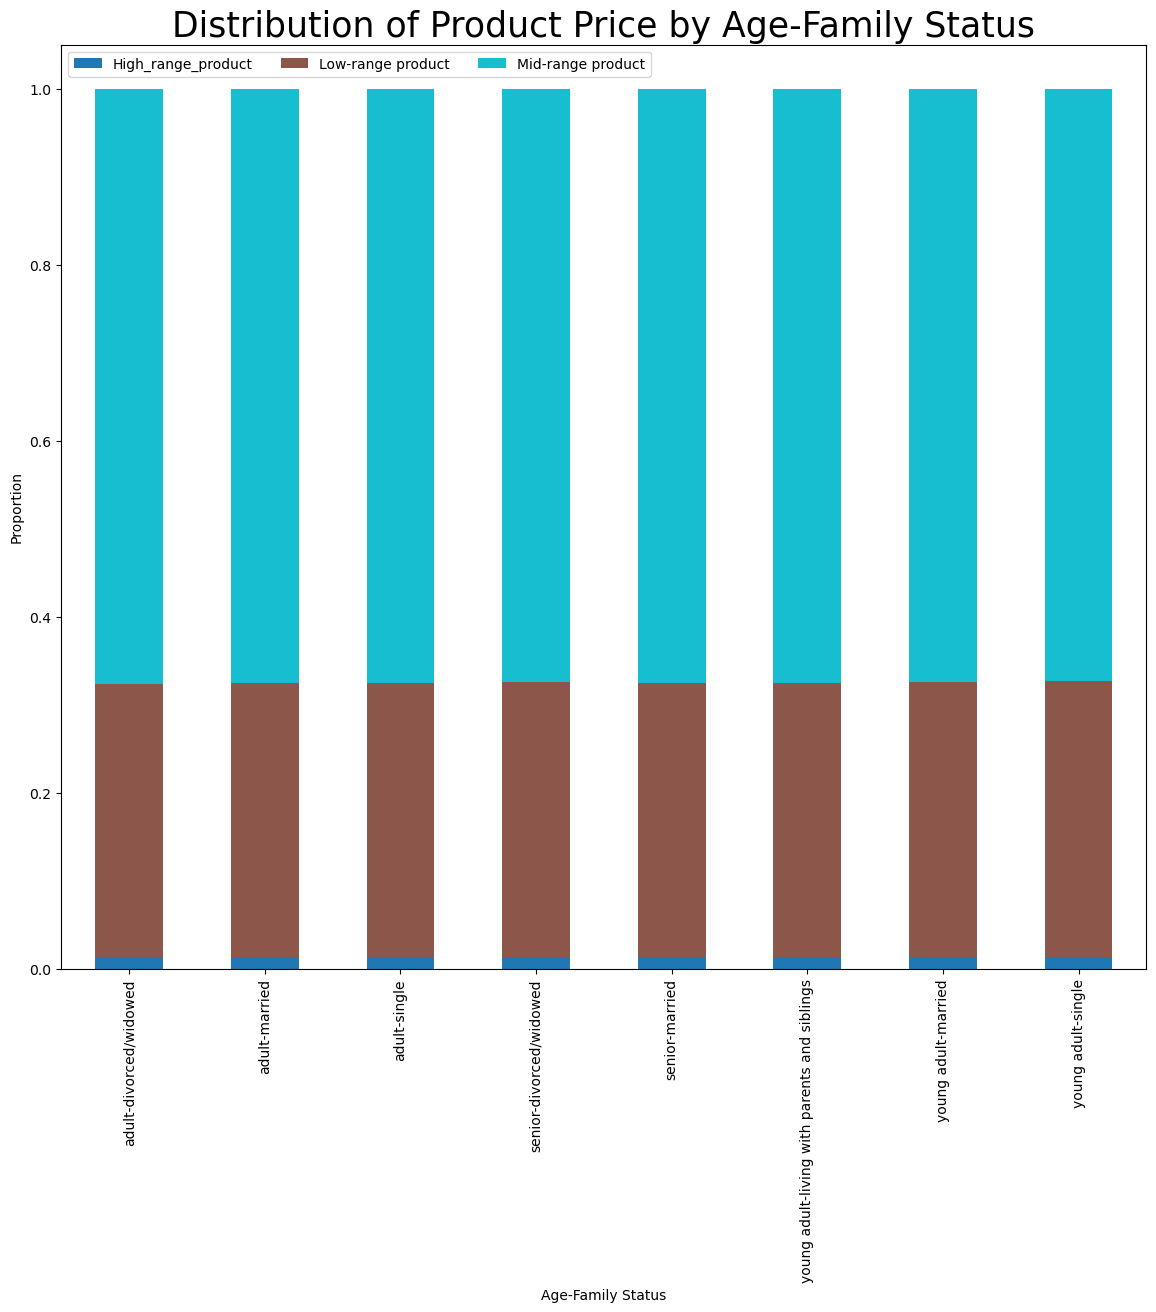

In [53]:
spend_age_family_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(14,12))

plt.title('Distribution of Product Price by Age-Family Status', fontsize=25)
plt.legend(loc="upper left", ncol=3)
plt.xlabel("Age-Family Status")
plt.ylabel("Proportion")

The distribution suggest that product prices do not influence ordering habits based on age and family status.

### Q9.

What different classifications does the demographic information suggest? Age?
Income? Certain types of goods? Family status?

#### A. Inccome profile bar chart

Text(0, 0.5, 'Income Profile')

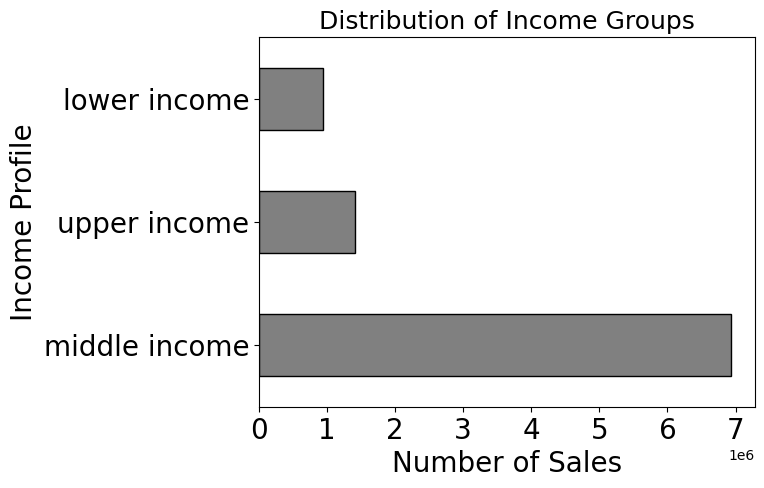

In [59]:
# creates bar plot displaying age gender group distribution of sales

bar_income_group=df['income_group'].value_counts().plot.barh(color= 'grey', edgecolor='black',fontsize=20)
plt.title('Distribution of Income Groups', fontsize=18)
plt.xlabel('Number of Sales', fontsize=20)
plt.ylabel('Income Profile', fontsize=20)

#### B. Alcohol by Age Group

In [65]:
#Creating a crosstab for 'age group' and 'alcohol_purchased'

alcohol = pd.crosstab(df['age_group'], df['alcohol_purchased'])

alcohol

alcohol_purchased,No,Yes
age_group,,
adult,4651916,285675
senior,2325101,134728
young adult,1781863,110118


In [66]:
#creating cross tab to display labels


alcohol_labels=pd.crosstab(index=df['age_group'],columns=df['alcohol_purchased'])

In [69]:
alcohol_yes = alcohol.drop(['No'], axis=1)

alcohol_yes

alcohol_purchased,Yes
age_group,
adult,285675
senior,134728
young adult,110118


Text(0, 0.5, 'Age Group')

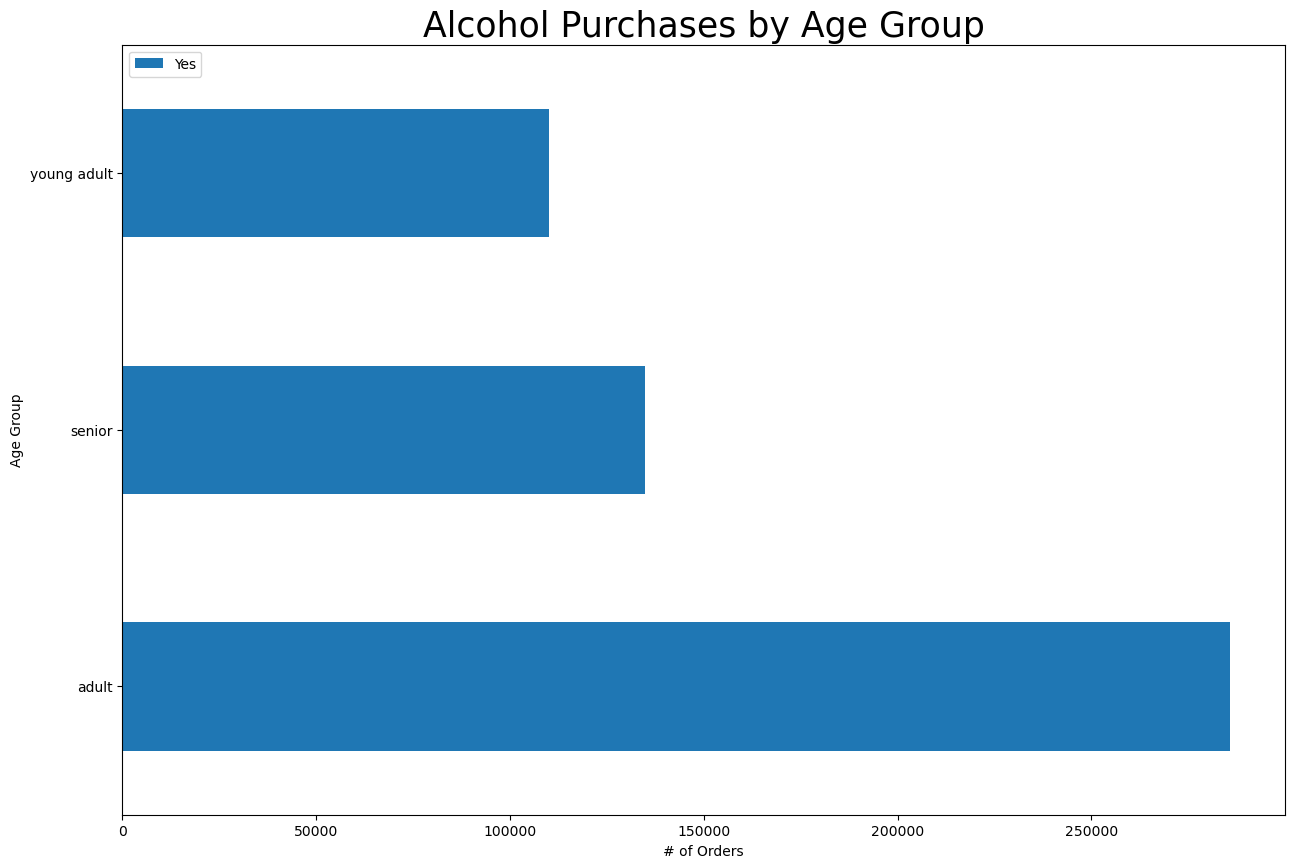

In [71]:
alcohol_yes.plot(kind='barh', 
                    stacked=False, 
                    colormap='tab10', 
                    figsize=(15,10))

plt.title('Alcohol Purchases by Age Group', fontsize=25)
plt.legend(loc="upper left", ncol=3)
plt.xlabel("# of Orders")
plt.ylabel("Age Group")

#### C. Top 10 products for young adults

In [72]:
#Creating a crosstab for age group and product name
prod_age = pd.crosstab(df['product_name'], df['age_group'])

prod_age

age_group,adult,senior,young adult
product_name,,,
#2 Coffee Filters,124,63,58
#2 Cone White Coffee Filters,1,0,0
#2 Mechanical Pencils,0,0,1
#4 Natural Brown Coffee Filters,42,14,16
#NAME?,6,2,2
...,...,...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,2,3,1
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,11,2,4
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,16,6,7


In [73]:
#creating cross tab to display labels
prod_age_labels=pd.crosstab(index=df['product_name'],columns=df['age_group'])

In [74]:
# drop adult and senior columns

prod_age_young = prod_age.drop(['adult', 'senior'], axis=1)

prod_age_young

age_group,young adult
product_name,
#2 Coffee Filters,58
#2 Cone White Coffee Filters,0
#2 Mechanical Pencils,1
#4 Natural Brown Coffee Filters,16
#NAME?,2
...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,1
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,4
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,7


In [75]:
# sort prod_age dataframe top 10

prod_age_young_sort = prod_age_young.sort_values(['young adult'], ascending=[False]).head(10)

prod_age_young_sort 

age_group,young adult
product_name,
Banana,27745
Bag of Organic Bananas,22095
Organic Strawberries,15523
Organic Baby Spinach,14071
Organic Hass Avocado,12421
Organic Avocado,10310
Large Lemon,8919
Limes,8182
Organic Raspberries,8178


In [79]:
colors = ['cyan', 'blue', 'green', 'yellow', 'red', 'orange', 'brown', 'purple', 'darkgray', 'pink']

Text(0, 0.5, 'Product')

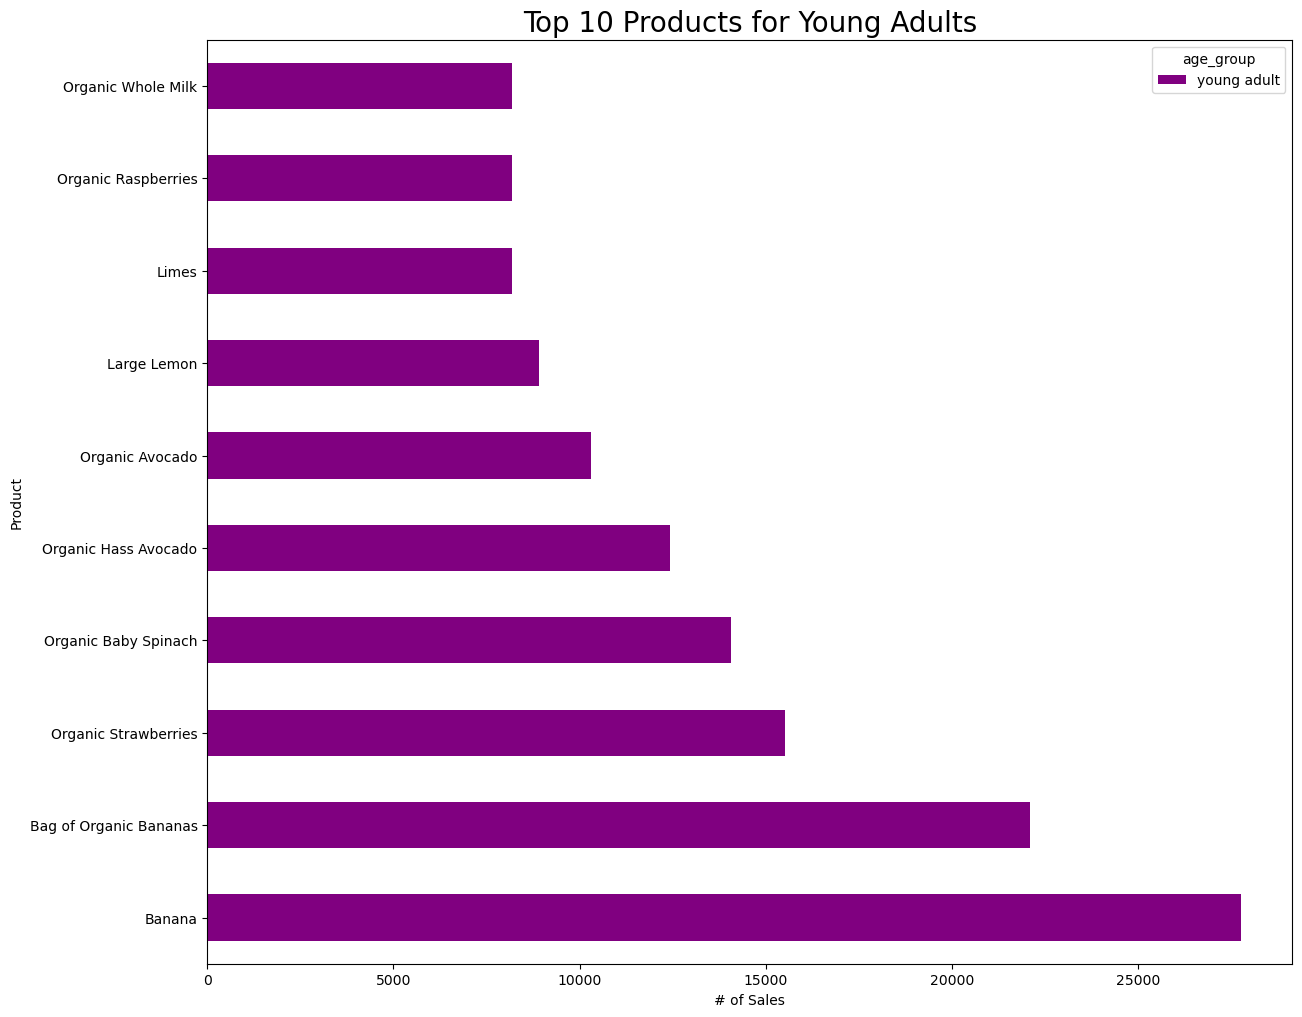

In [89]:
prod_age_young_sort.plot(kind='barh', 
                    stacked=False, 
                    color= 'purple',  
                    figsize=(14,12))

plt.title('Top 10 Products for Young Adults', fontsize=20)
plt.xlabel("# of Sales")
plt.ylabel("Product")

   #### D. Top 10 Products for Adults

In [90]:
# drop young adult and senior columns

prod_age_adult = prod_age.drop(['young adult', 'senior'], axis=1)

prod_age_adult

age_group,adult
product_name,
#2 Coffee Filters,124
#2 Cone White Coffee Filters,1
#2 Mechanical Pencils,0
#4 Natural Brown Coffee Filters,42
#NAME?,6
...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,2
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,11
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,16


In [91]:
# sort prod_age dataframe top 10

prod_age_adult_sort = prod_age_adult.sort_values(['adult'], ascending=[False]).head(10)

prod_age_adult_sort 

age_group,adult
product_name,
Banana,72045
Bag of Organic Bananas,58258
Organic Strawberries,40909
Organic Baby Spinach,37077
Organic Hass Avocado,33281
Organic Avocado,27405
Large Lemon,23139
Strawberries,21831
Limes,21530


Text(0, 0.5, 'Product')

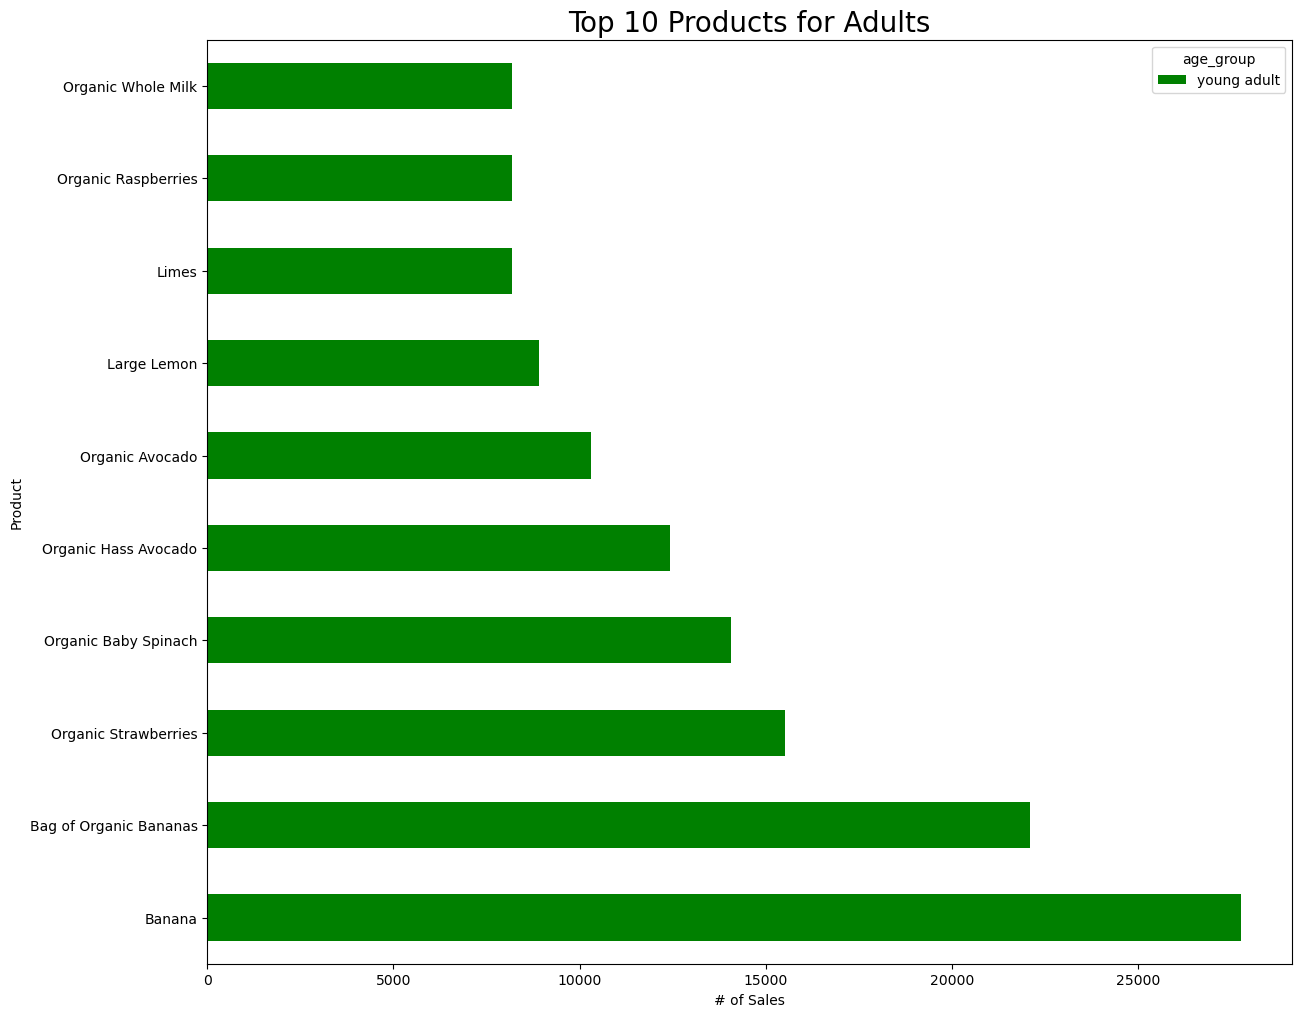

In [92]:
prod_age_young_sort.plot(kind='barh', 
                    stacked=False, 
                    color= 'green',  
                    figsize=(14,12))

plt.title('Top 10 Products for Adults', fontsize=20)
plt.xlabel("# of Sales")
plt.ylabel("Product")

#### E. Top 10 Products for Seniors

In [93]:
# drop young adult and young adult columns

prod_age_senior = prod_age.drop(['young adult', 'adult'], axis=1)

prod_age_senior

age_group,senior
product_name,
#2 Coffee Filters,63
#2 Cone White Coffee Filters,0
#2 Mechanical Pencils,0
#4 Natural Brown Coffee Filters,14
#NAME?,2
...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,3
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,2
with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,6


In [95]:
# sort prod_age dataframe top 10

prod_age_senior_sort = prod_age_senior.sort_values(['senior'], ascending=[False]).head(10)

prod_age_senior_sort 

age_group,senior
product_name,
Banana,35882
Bag of Organic Bananas,29404
Organic Strawberries,20533
Organic Baby Spinach,18293
Organic Hass Avocado,16722
Organic Avocado,13151
Large Lemon,11492
Strawberries,10835
Limes,10721


Text(0, 0.5, 'Product')

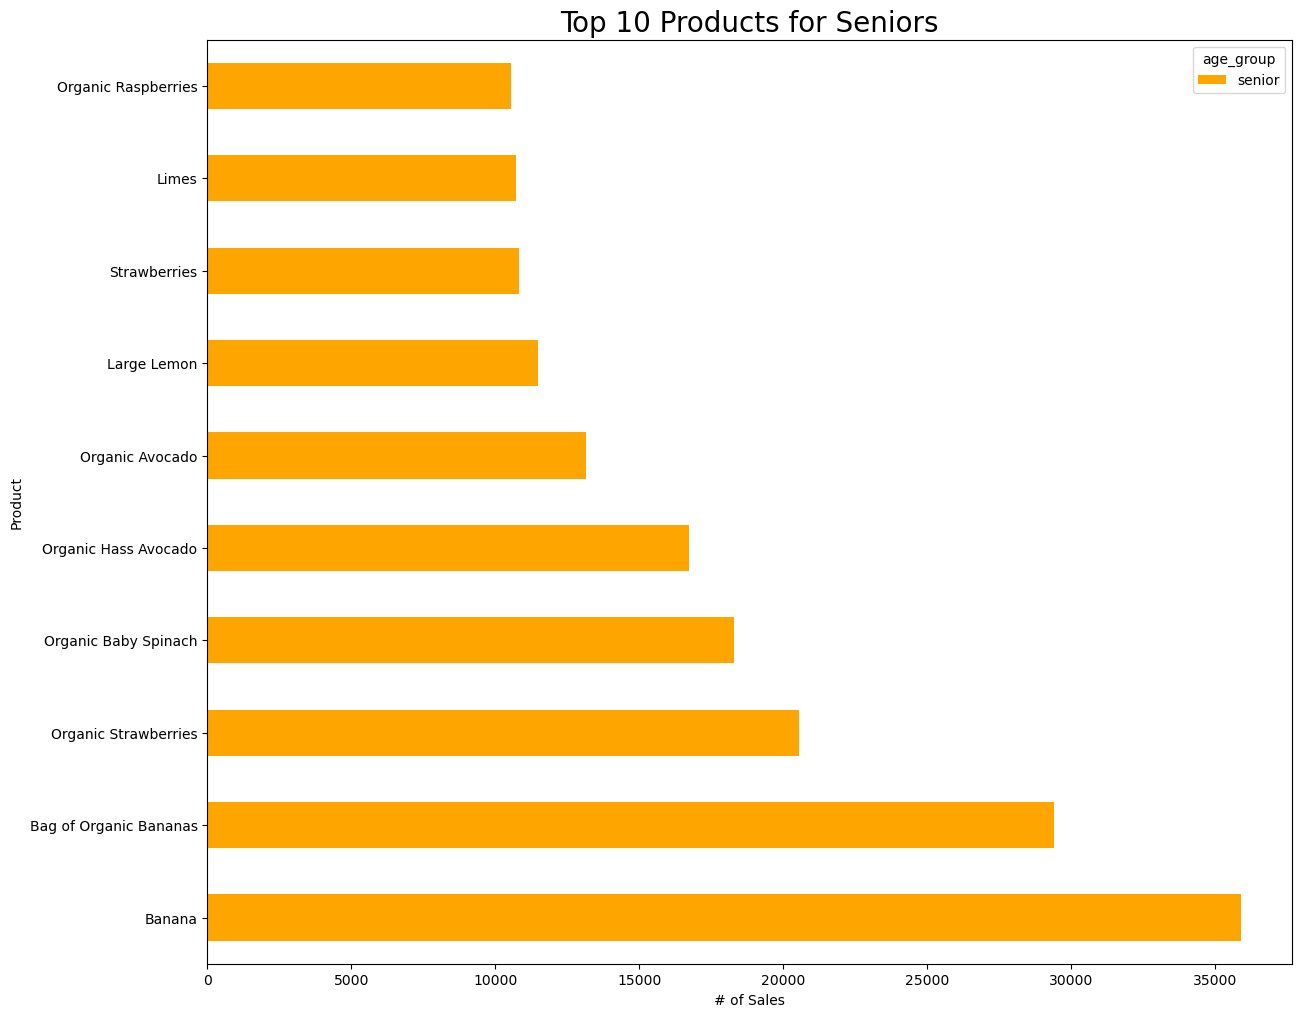

In [96]:
prod_age_senior_sort.plot(kind='barh', 
                    stacked=False, 
                    color= 'orange',  
                    figsize=(14,12))

plt.title('Top 10 Products for Seniors', fontsize=20)
plt.xlabel("# of Sales")
plt.ylabel("Product")

## 05 Export Final Dataset

In [ ]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'complete_instacart_data_final_v02.pkl'))